## Categorization, MDS, and Prediction Accuracy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import spatial  
from sklearn.model_selection import LeaveOneOut

Data adapted from Leuven Concept Database (De Deyne et al., 2008).

Extract data from file.

In [2]:
df = pd.read_csv('data-categorization.csv')

Get feature list.

In [3]:
features = list(df.features)
features.remove('category')

In [4]:
len(features)

44

Get names of all animals.

In [5]:
names = list(df); del names[0]

In [6]:
names

['eagle',
 'dove',
 'duck',
 'magpie',
 'pheasant',
 'vulture',
 'rooster',
 'turkey',
 'canary',
 'chicken',
 'cuckoo',
 'crow',
 'chickadee',
 'seagull',
 'blackbird',
 'sparrow',
 'stork',
 'parrot',
 'parakeet',
 'peacock',
 'pelican',
 'penguin',
 'heron',
 'robin',
 'woodpecker',
 'ostrich',
 'owl',
 'falcon',
 'swan',
 'swallow',
 'anchovy',
 'dolphin',
 'trout',
 'goldfish',
 'shark',
 'herring',
 'squid',
 'cod',
 'carp',
 'orca',
 'eel',
 'piranha',
 'plaice',
 'flatfish',
 'sperm whale',
 'ray',
 'sardine',
 'pike',
 'stickleback',
 'sole',
 'whale',
 'salmon',
 'swordfish']

Get binary feature matrix (animal-by-feature).

In [7]:
F = pd.read_csv("data-categorization.csv", header=0, usecols=list(np.arange(1,54)))
F = np.asarray(F)

Get category labels.

In [8]:
labels = F[len(F)-1,:]

In [9]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

Config `F` such that each row is feature vector of one animal.

Each column is either a bird (category label = 0) or a fish (category label = 1).

In [10]:
F = np.delete(F,len(F)-1,0) 
F = np.transpose(F)

In [11]:
len(F)

53



1. Main variables for analysis:
    - `F`:        53-by-44 binary matrix, i.e. 53 animal exemplars (30 birds and 23 fish) and 44 features
    - `labels`:   53 binary category labels (0 for bird; 1 for fish), i.e. ground truth that you'll predict
    
    
2. Auxillary variables
    - `names`:    53 animal names
    - `features`: 44 feature names
    
In this project, I implement, evaluate, and analyze two models of categorization, based on the prototype and exemplar theories. I then test these models against a dataset of birds and fish, features and category labels of which have been provided in the matrix and array processed for you (see above). 

I will start by doing a visualization, via multi-dimensional scaling (MDS)---this will offer you an intuition of the data to work with in a 2D space. I will then implement each of the two models, evaluate them in leave-one-out-cross-validation, and interpret the errors made by each model.

### Data visualization 

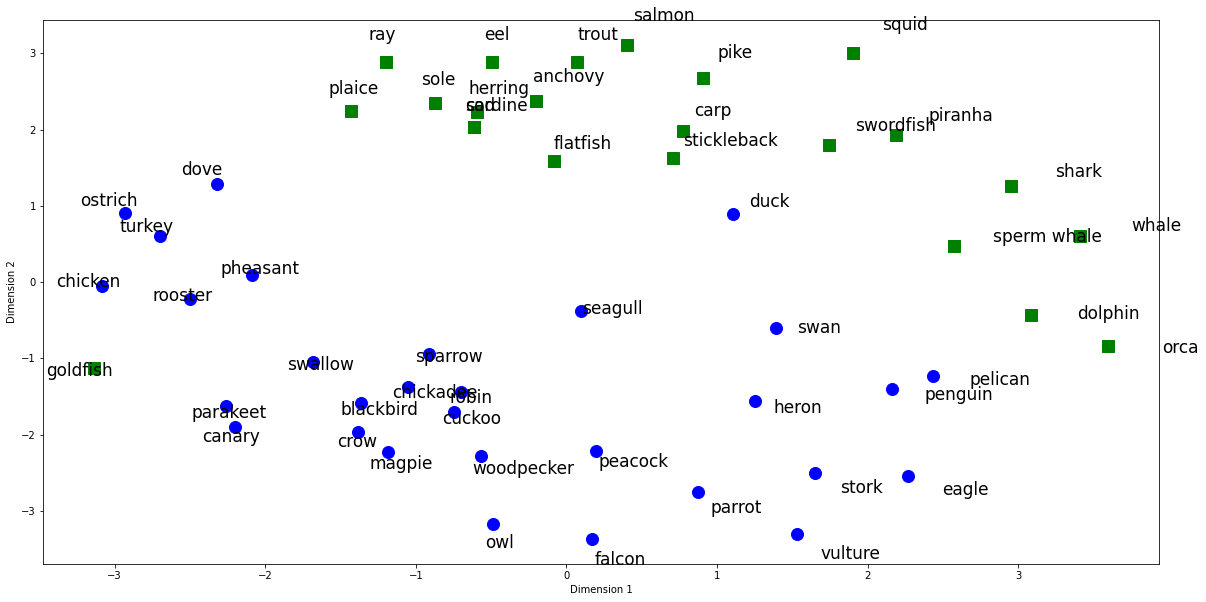

In [12]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
F_lowdim = embedding.fit_transform(F)

birdinds = np.where(labels==0)
fishinds = np.where(labels==1)

fig = plt.figure(figsize=(20, 10))
plt.plot(F_lowdim[birdinds,0],F_lowdim[birdinds,1],'bo',markersize=12)
plt.plot(F_lowdim[fishinds,0],F_lowdim[fishinds,1],'gs',markersize=12)

for i in range(0,len(F)):
    plt.text(F_lowdim[i,0]*1.1,F_lowdim[i,1]*1.1,names[i],fontsize=17)
    
plt.xlabel('Dimension 1')    
plt.ylabel('Dimension 2')    

plt.show()

## Summary of Tasks
**Task 1**: Evaluate each model by standard leave-one-animal-out cross validation. 

**Task 2**: Implement two models of categorization: a prototype model and an exemplar model .

**Task 3**: Report predictive accuracy of each model in percentage (i.e. % correct predictions out of 53 animals). 

**Task 4**: Perform an error analysis on the two models (i.e. report which exemplars each model failed on), then compare and discuss why the errors look the way they do.

In [13]:
loo = LeaveOneOut()
loo.get_n_splits(F)

53

In [15]:
#arrays that contain 1s and 0s for each preditction. 1 if the model got the prediction right and 0 if it got the prediction wrong
prototype_predictions = []
exemplar_predictions = []

for train_index, test_index in loo.split(F):
#     1) Get training and testing data points
    
    X_train, X_test = F[train_index], F[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    birdsf = []
    fishf = []

    for ind in range(len(y_train)):
        if y_train[ind] == 0:
            birdsf.append(X_train[ind])
        elif y_train[ind] == 1:
            fishf.append(X_train[ind])

#     2.1) Implement and predict with prototype model
    
    birds_prototype = np.mean(birdsf, axis=0)
    fish_protoype = np.mean(fishf, axis=0)

    if spatial.distance.euclidean(birds_prototype, X_test[0]) > spatial.distance.euclidean(fish_protoype, X_test[0]):
        pcategory = 1
    else:
        pcategory = 0

    if pcategory == y_test[0]:
        prototype_predictions.append(1)
    else:
        prototype_predictions.append(0)


#     2.2) Implement and predict with exemplar model

    bird_distances = []
    fish_distances = []

    for b in birdsf:
        bird_distances.append(spatial.distance.euclidean(b, X_test[0]))
    for f in fishf:
        fish_distances.append(spatial.distance.euclidean(f, X_test[0]))

    if np.mean(bird_distances) > np.mean(fish_distances):
        ecategory = 1
    else:
        ecategory = 0

    if ecategory == y_test[0]:
        exemplar_predictions.append(1)
    else:
        exemplar_predictions.append(0)

# 3) Report predictive accuracies (%)
print("Predictive Accuracy for Protype Model: " + str(round(np.mean(prototype_predictions) * 100, 2)))
print("\nPredictive Accuracy for Exemplar Model: " + str(round(np.mean(exemplar_predictions) * 100, 2)))

Predictive Accuracy for Protype: 94.34

Predictive Accuracy for Exemplar: 96.23


In [52]:
#error analysis
prototype_error_index = []
for i in range(len(prototype_predictions)):
    if prototype_predictions[i] == 0:
        prototype_error_index.append(i)
exemplar_error_index = []
for i in range(len(exemplar_predictions)):
    if exemplar_predictions[i] == 0:
        exemplar_error_index.append(i)

In [65]:
#what the prototype model got wrong
for ind in prototype_error_index:
    print(names[ind])

duck
goldfish
orca


In [66]:
#what the exemplar model go wrong
for ind in exemplar_error_index:
    print(names[ind])

duck
goldfish


Both the exemplar model and the prototype model got 'duck' and 'godlfish' wrong. This is because if we look at the MDS graph, the duck clusters with all other fish much more closely than it does with the birds. Same with the goldfish; it clusters much more closely with the others birds than it does with other fish. Both these cluster so extremely with the opposite category that no matter what model is used it cannot categorize them properly. 

For the goldfish the rationale might be that that out of all the fish it is the only one that is domesticated. No other fish are domesticated but many other birds are domesticated.

For the duck the rationale might be that it seems to be the only bird that exclusively lives in water and also barely flies. So for instance, both swans and seagulls are associated with water in some sense but they both have long wings and are much less water bound comapred to the duck.

Only the prototype model gets the 'orca' wrong! I think this has to do with the location of where both the bird and fish clusters have most density. Becasue the density of the fish are far from the orcha while the density of the the birds is relatively more spread out, the prototype (that is calculated by averaging the features of items in both categories) for the birds will be closer to the orca compared to the prototype of the birds.